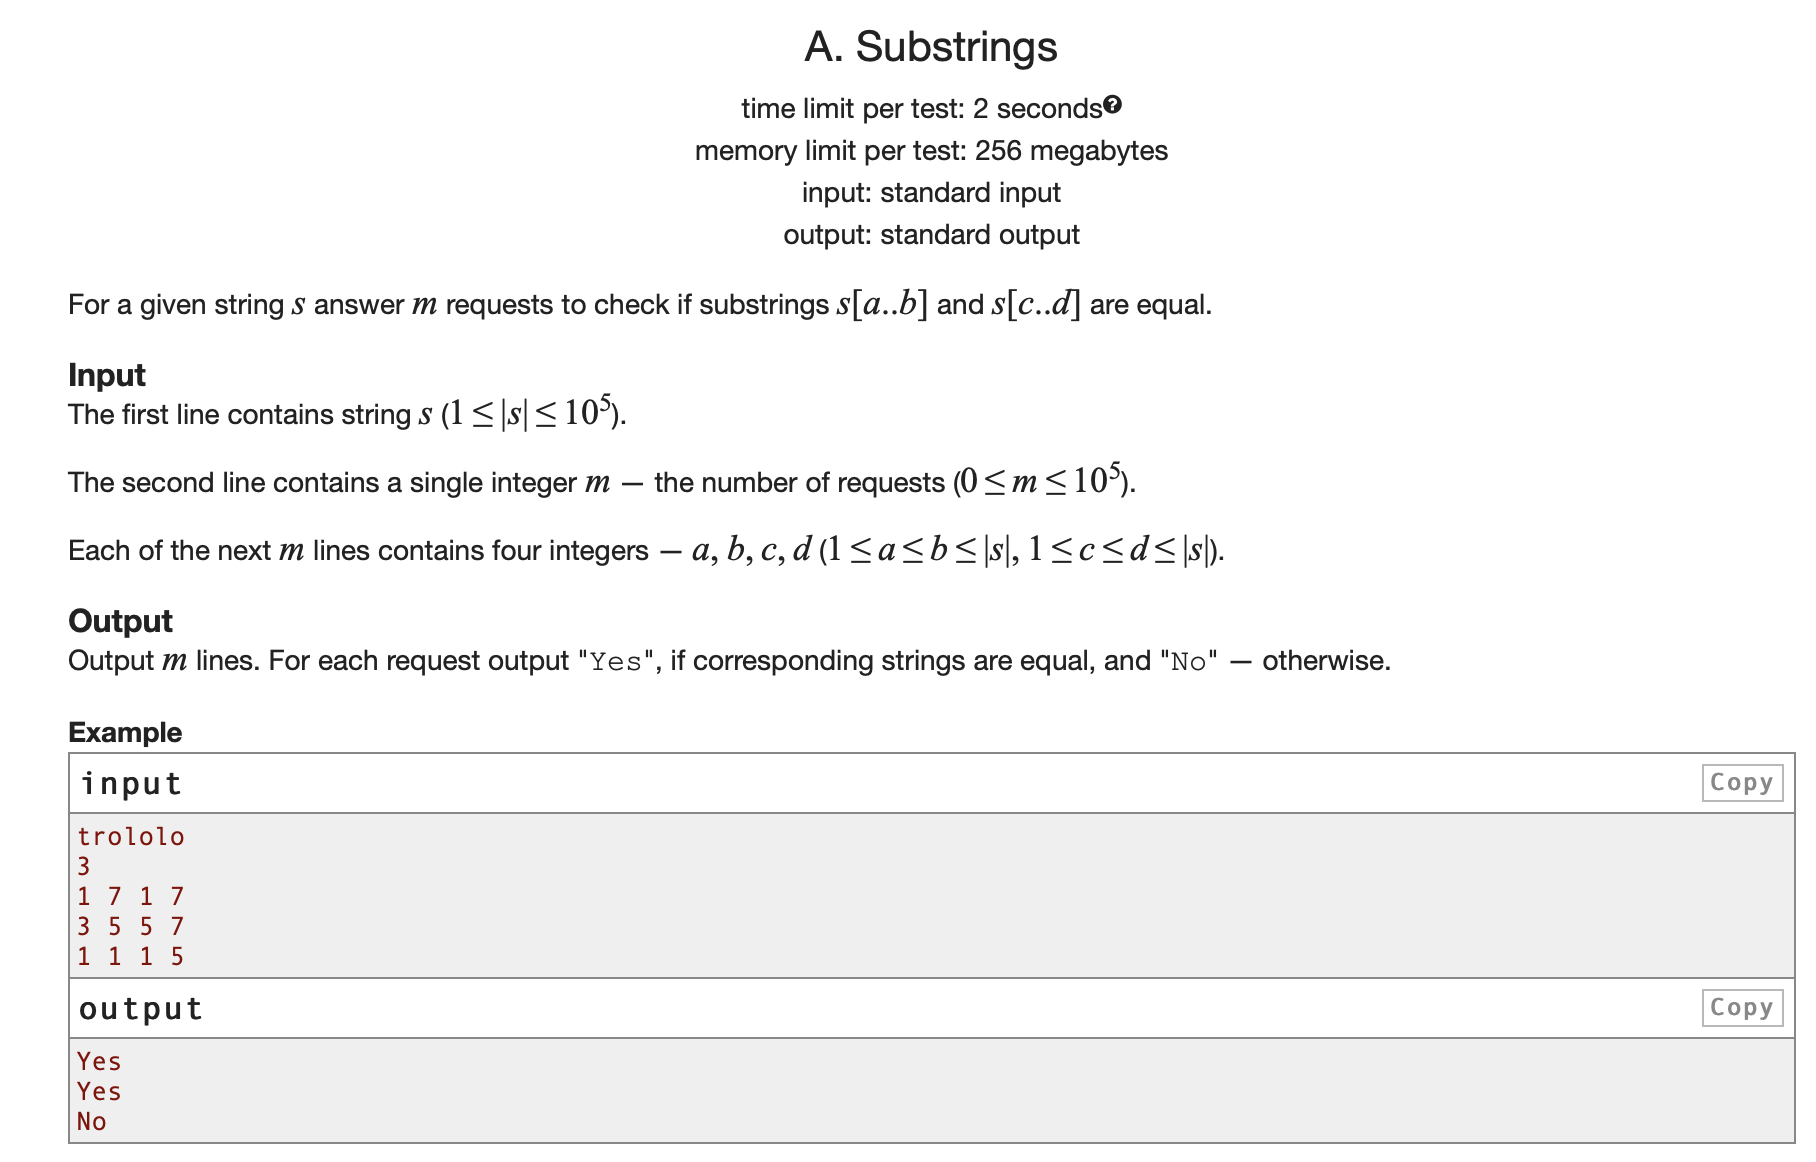

In [84]:
M = int(1e9 + 7)
P = 31
MIN_ORD = ord('a')


class HashPrefix:
    def __init__(self, string):
        self.string = string
        self.prefix_hash, self.powers = self._get_prefix_hash()

    def _get_prefix_hash(self):
        hashes = [0] * len(self.string)
        hashes[0] = self._get_ord(self.string[0])
        powers = [1] * len(self.string)
        for i in range(1, len(self.string)):
            hashes[i] = (hashes[i - 1] * P + self._get_ord(self.string[i])) % M
            powers[i] = (powers[i - 1] * P) % M
        return hashes, powers

    def get_hash(self, l, r):
        if l == 0:
            return self.prefix_hash[r]
        return (self.prefix_hash[r] - (self.prefix_hash[l - 1] * self.powers[r - l + 1]) % M + M) % M

    @staticmethod
    def _get_ord(letter):
        return ord(letter) - MIN_ORD + 1

    def __call__(self, l1, r1, l2, r2):
        hash_1 = self.get_hash(l1 - 1, r1 - 1)
        hash_2 = self.get_hash(l2 - 1, r2 - 1)
        if r1 - l1 == r2 - l2 and hash_1 == hash_2:
            return 'Yes'
        return 'No'


string = input()
hash_prefix = HashPrefix(string)
m = int(input())
for _ in range(m):
    inp = list(map(int, input().split()))
    print(hash_prefix(*inp))

trololo
3
1 7 1 7
Yes
3 5 5 7
Yes
1 1 1 5
No


In [81]:
tests = [
    ('trololo', (1, 7, 1, 7), (3, 5, 5, 7), (1, 1, 1, 5)),
    ('abacaba', (1, 1, 1, 2), (1, 2, 5, 6), (1, 3, 5, 7), (1, 4, 4, 7)),
]
expected = [ 
    ('Yes', 'Yes', 'No'),
    ('No', 'Yes', 'Yes', 'No'),
]

for test, expect in zip(tests, expected):
    hash_prefix = HashPrefix(test[0])
    for tests, exp in zip(test[1:], expect):
        assert hash_prefix(*tests) == exp

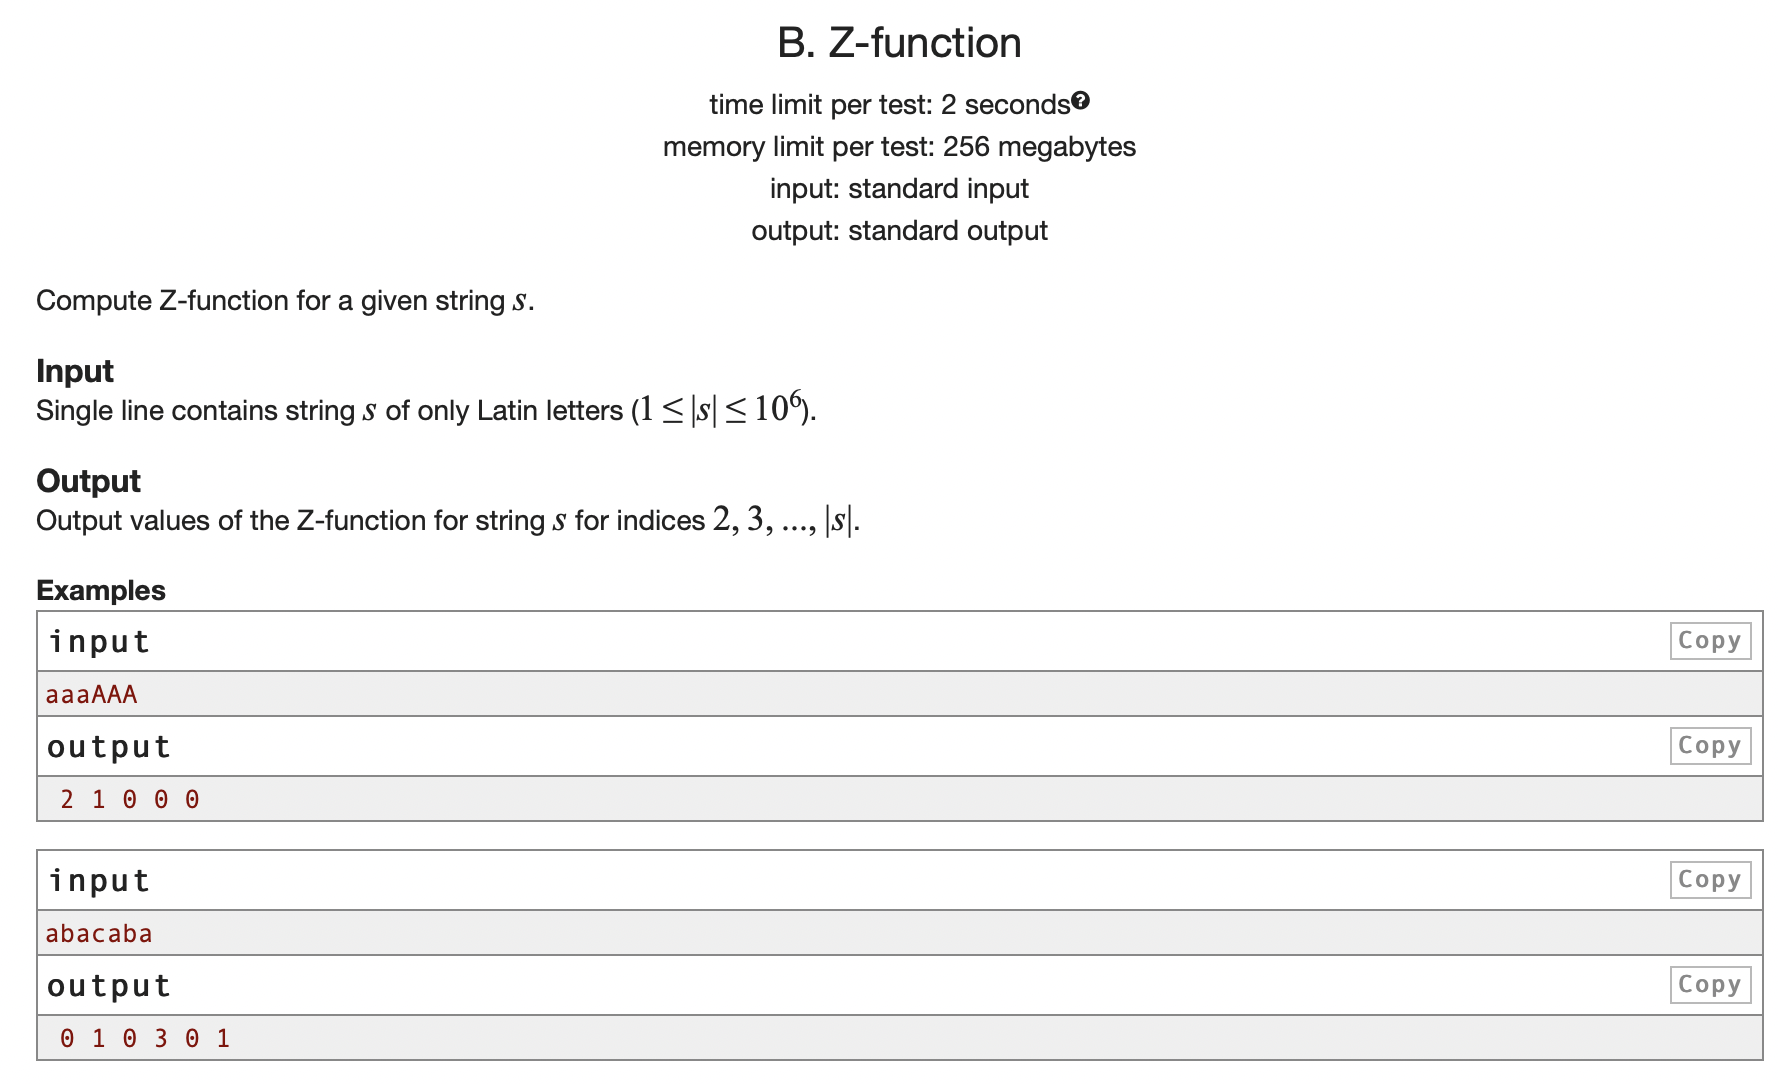

In [91]:
def z_function(string):
    l = 0
    r = 0
    z = [0] * len(string)
    for i in range(1, len(string)):
        z[i] = max(0, min(r - i, z[i - l]))
        while i + z[i] < len(string) and string[z[i]] == string[i + z[i]]:
            z[i] += 1
        if i + z[i] > r:
            l = i
            r = i + z[i]
    return z[1:]


string = input()
print(*z_function(string))

aaaAAA
2 1 0 0 0


In [90]:
tests = [
    ('aaaAAA'),
    ('abacaba'),
]
expected = [
    [2, 1, 0, 0, 0],
    [0, 1, 0, 3, 0, 1],
]

for test, expect in zip(tests, expected):
    assert z_function(test) == expect

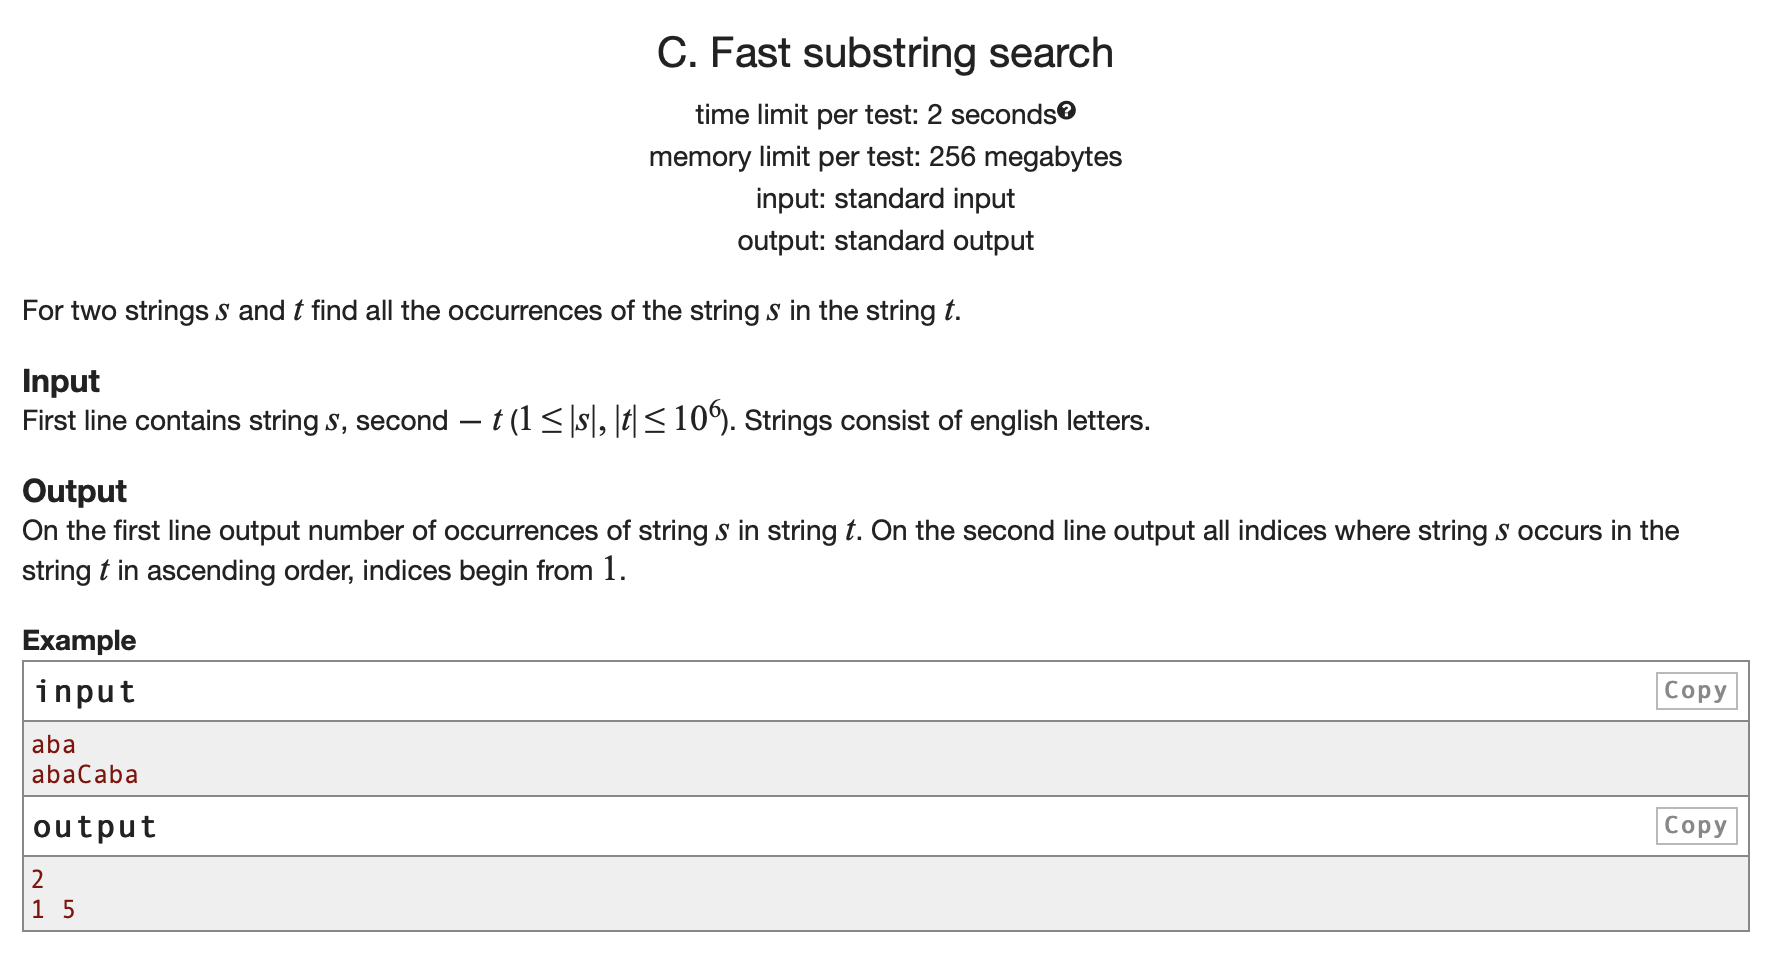

In [112]:
SEPARATOR = '#'


def my_prefix_function(string, len_pattern):
    prefix = [0] * len(string)
    occurances = []
    for i in range(1, len(string)):
        k = prefix[i - 1]
        while k > 0 and string[i] != string[k]:
            k = prefix[k - 1]
        if string[i] == string[k]:
            k += 1
        prefix[i] = k
        if k == len_pattern:
            occurances.append(i - 2 * len_pattern + 1)
    return occurances


def KMS(pattern, string):
    full_string = f'{pattern}{SEPARATOR}{string}'
    return my_prefix_function(full_string, len(pattern))


pattern = input()
string = input()
result = KMS(pattern, string)
print(len(result))
print(*result)

aba
abaCaba
2
1 5


In [111]:
tests = [
    ('aba', 'abacaba'),
]
expected = [
    [1, 5],
]

for test, expect in zip(tests, expected):
    assert KMS(*test) == expect

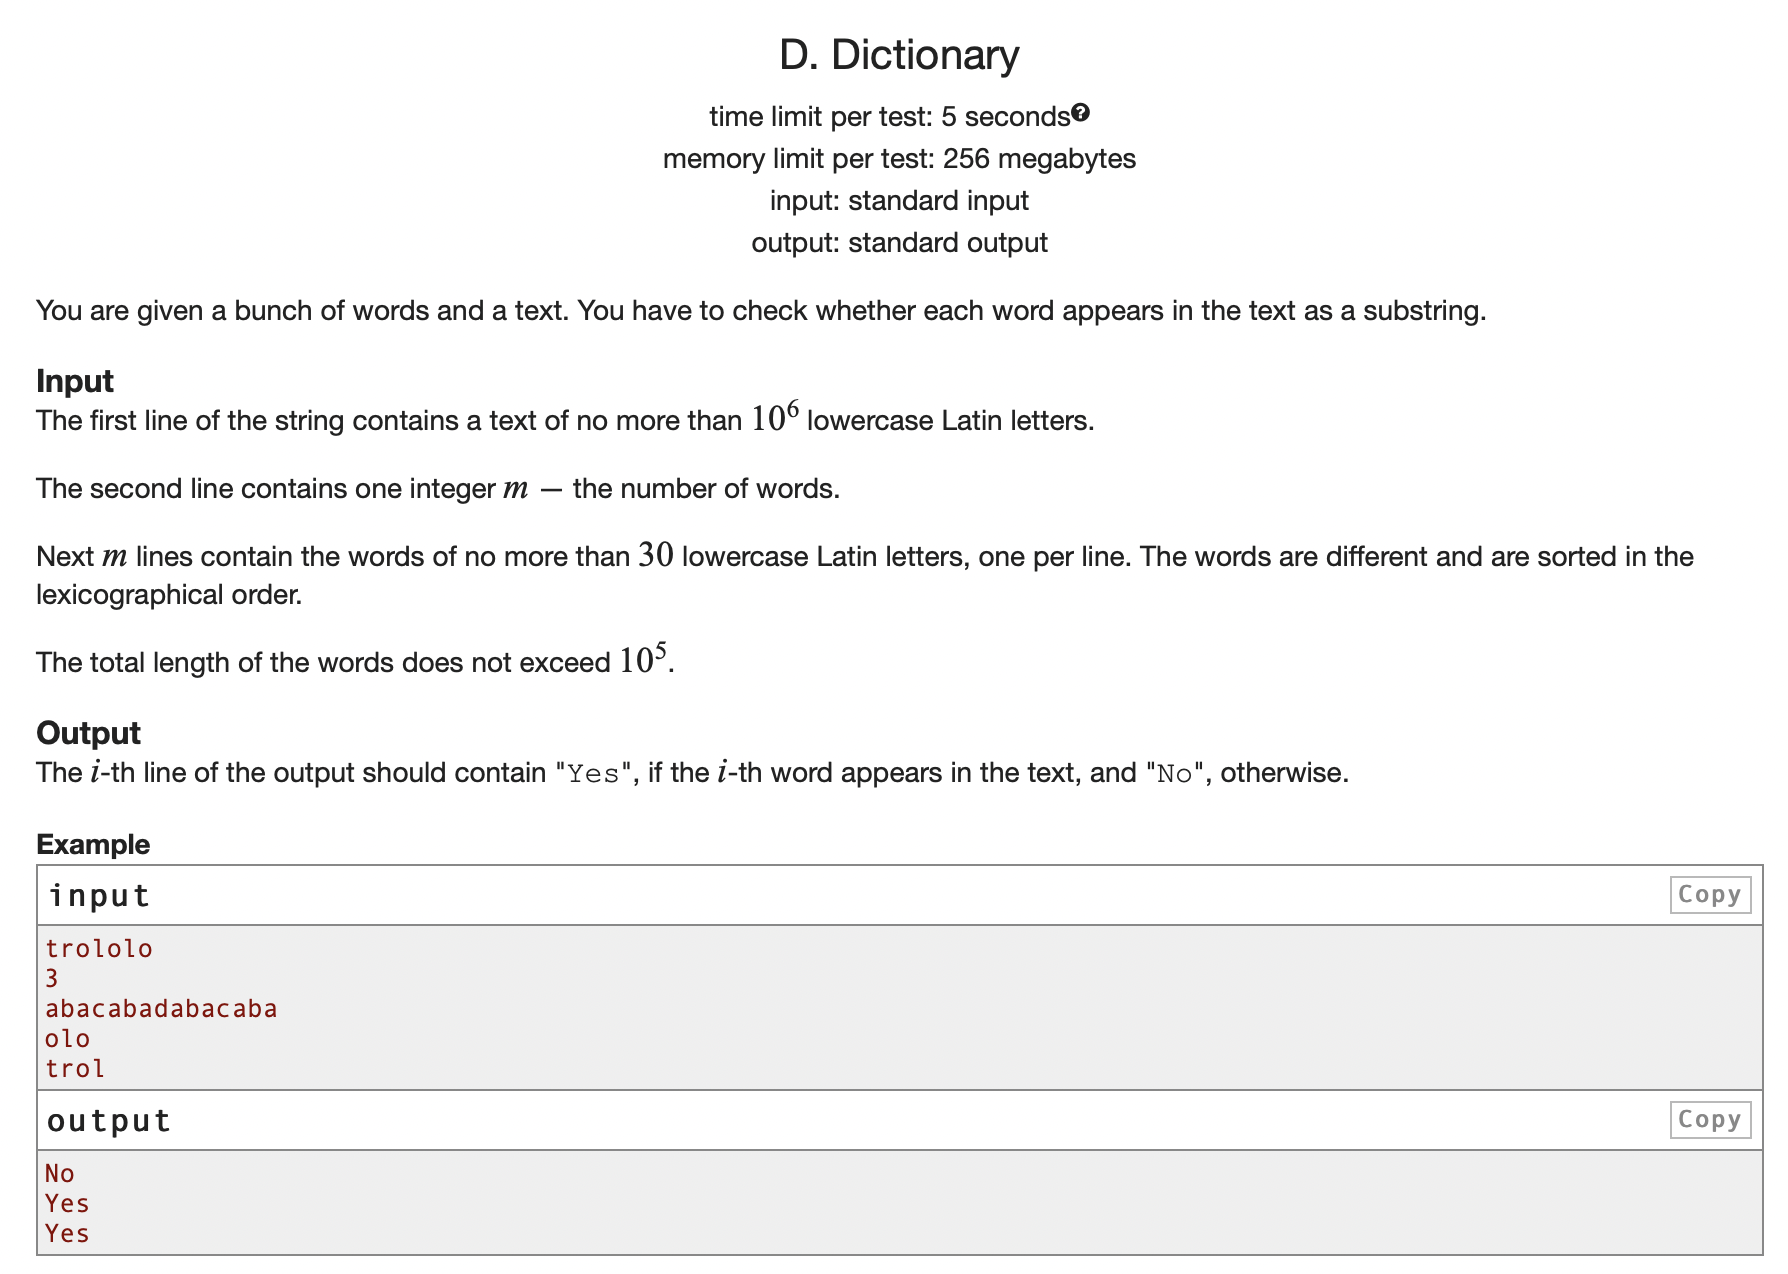

In [204]:
from dataclasses import dataclass, field

MAX_WORD_LEN = 30


@dataclass
class TrieNode:
    children: dict = field(default_factory=dict)

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, l_pos, string):
        node = self.root
        for char in string[l_pos:l_pos + MAX_WORD_LEN]:
            if char in node.children:
                node = node.children[char]
            else:
                new_node = TrieNode()
                node.children[char] = new_node
                node = new_node

    def contains(self, string):
        node = self.root
        is_contained = True
        for char in string:
            if char not in node.children:
                is_contained = False
                break
            node = node.children[char]
        if is_contained:
            return 'Yes'
        return 'No'

    def fit(self, string):
        for i in range(len(string)):
            self.insert(i, string)

            
text = input()
trie = Trie()
trie.fit(text)
m = int(input())
for _ in range(m):
    string = input()
    print(trie.contains(string))

ababab
2
ab
Yes
bab
Yes


In [ ]:
from dataclasses import dataclass, field

MAX_WORD_LEN = 30


@dataclass
class TrieNode:
    is_terminate = False
    children: dict = field(default_factory=dict)

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, string):
        node = self.root
        for char in string:
            if char in node.children:
                node = node.children[char]
            else:
                new_node = TrieNode()
                node.children[char] = new_node
                node = new_node
        node.is_terminate = True

    def contains(self, string):
        node = self.root
        is_contained = True
        for char in string:
            if char not in node.children:
                is_contained = False
                break
            node = node.children[char]
        if is_contained and node.is_terminate:
            return True
        return False

            
text = input()
trie = Trie()
m = int(input())
for _ in range(m):
    string = input()
    trie.insert(string)
    is_contained = False
    for i in range(len(text)):
        substring = text[i:i + len(string)]
        if len(substring) < len(string):
            break
        else:
            if trie.contains(text[i:i + len(string)]):
                is_contained = True
                break
    if is_contained:
        print('Yes')
    else:
        print('No')

In [220]:
ALPHABET_SIZE = 26
MIN_ORD = ord('a')
MAX_WORD_LEN = 30


class Trie:
    def __init__(self):
        self.size = 1
        self.next_v = []
        self.isTerminal = [False]
        self.append_next_v()

    def insert(self, string):
        v = 0
        for char in string:
            char_ord = self._get_ord(char)
            if self.next_v[v][char_ord] == -1:
                self.append_next_v()
                self.isTerminal.append(False)
                self.next_v[v][char_ord] = self.size
                self.size += 1
            v = self.next_v[v][char_ord]
        self.isTerminal[v] = True

    def contains(self, string):
        v = 0
        for char in string:
            char_ord = self._get_ord(char)
            if self.next_v[v][char_ord] == -1:
                return False
            v = self.next_v[v][char_ord]
        if self.isTerminal[v]:
            return True
        return False

    def append_next_v(self):
        self.next_v.append([-1] * ALPHABET_SIZE)

    @staticmethod
    def _get_ord(char):
        return ord(char) - MIN_ORD


text = input()
trie = Trie()
m = int(input())
for _ in range(m):
    string = input()
    trie.insert(string)
for i in range(len(text)):
    substring = text[i:i + MAX_WORD_LEN]
    if len(substring) < len(string):
        break
    else:
        if trie.contains(text[i:i + len(string)]):
            print('Yes')
        else:
            print('No')

asdasdas
3
as
das
as


In [202]:
tests = [
    ('trololo', 'abacabadabacaba', 'olo', 'trol', 'l', ''),
    ('aaaaaaa', 'aaaaaaa', 'aa', 'a', 'aaaaaaaa'),
    ('lalalad', 'al', 'ala', 'la', 'l', 'd', 'ad', 'da'),
]
expected = [ 
    ('No', 'Yes', 'Yes', 'Yes', 'Yes'),
    ('Yes', 'Yes', 'Yes', 'No'),
    ('Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'),
]
for test, expect in zip(tests, expected):
    trie = Trie()
    trie.fit(test[0])
    for tests, exp in zip(test[1:], expect):
        assert trie.contains(tests) == exp